# StaTDS Tutorial: Classification

Classification is one of the most crucial and common tasks in machine learning. Its goal is to assign labels to instances based on their input features. Ranging from medical diagnosis to fraud detection, classification algorithms enable the transformation of raw data into informed decisions. In this tutorial, we'll focus on comparing various classification algorithms to understand their strengths and weaknesses across different contexts.

## Dependency Installation




Before we start, it's crucial to set up our development environment by installing the necessary dependencies. If you're using Google Colab, you only need to install StaTDS.

In [1]:
pip install statds

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 41.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 27.3 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.21.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 2.2.0 which is incompatible.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.2.0 which is incompatible.


In [6]:
!pip install scikeras

## Evaluating Classification Algorithms: A Structured Approach


The evaluation process of classification algorithms can be structured into the following steps to ensure a rigorous and meaningful comparison. This task has become essential due to the wide variety of available algorithms and the impact of their parameters on performance.

1. Selection of Datasets and Algorithms: We begin by jointly selecting datasets and algorithms. This choice is critical as it defines the context and expectations of our comparative study.

2. Training and Evaluation of Algorithms: Each algorithm is trained on the selected datasets. This step is crucial in understanding how each algorithm performs with different data. Here, we also determine which metrics to study, knowing whether these are intended to be maximized or minimized.

3. Collection and Analysis of Metrics: The results from each algorithm-dataset combination are collected. We then conduct a preliminary analysis to identify trends and notable behaviors. This analysis helps us formulate hypotheses about the performance and characteristics of the algorithms.

4. Statistical Analysis: We proceed with conducting statistical tests on the gathered results. This step is vital to determine the presence of significant statistical differences between the algorithms and to ensure that our conclusions are solidly grounded.

5. Conclusion and Presentation of Results: Finally, we conclude our study with the presentation of our findings. Here, we synthesize our research, highlight key differences, and provide data-based recommendations.

![StepsEvaluate](https://media.discordapp.net/attachments/1179836822440902738/1179836868834119710/StepsEvaluate.png?ex=657b3bb5&is=6568c6b5&hm=6e753d5fe91a04bb6d407b99acc6f9a5302f9c36c455f6d8a7a8183fd1368dfc&=&format=webp&quality=lossless)


Each of these steps will be illustrated and detailed below, using a case example. This approach will facilitate tracking and replication in similar situations. Through this structured flow, we aim to provide a clear and reproducible methodology for comparing classification algorithms.

### Select Datasets and Algorithms

To ensure a practical and relevant analysis, we will select classification datasets from the UCI Machine Learning Repository, covering diverse domains such as biology, automotive industry, and air quality, among others. This practical approach will aid in illustrating how the characteristics of data can influence the selection and configuration of the appropriate classification algorithm.

In [2]:
datasets_list = {
    "Iris": {"URL":"https://archive.ics.uci.edu/static/public/53/iris.zip", "index_target":-1},
    "Penguins": {"URL":"https://gist.githubusercontent.com/slopp/ce3b90b9168f2f921784de84fa445651/raw/4ecf3041f0ed4913e7c230758733948bc561f434/penguins.csv", "index_target":1, "remove_column":[0]},
    "Wine": {"URL":"https://archive.ics.uci.edu/static/public/109/wine.zip", "index_target":0},
    "Breast Cancer Wisconsin": {"URL":"https://archive.ics.uci.edu/static/public/17/breast+cancer+wisconsin+diagnostic.zip", "index_target":0, "remove_column":[0]},
    "Car Evaluation": {"URL":"https://archive.ics.uci.edu/static/public/19/car+evaluation.zip", "index_target":-1},
    "Glass Identification": {"URL":"https://archive.ics.uci.edu/static/public/42/glass+identification.zip", "index_target":-1, "remove_column":[0]},
    "Hepatitis": {"URL":"https://archive.ics.uci.edu/static/public/46/hepatitis.zip", "index_target":0},
    "Auction Verification": {"URL":"http://archive.ics.uci.edu/static/public/713/auction+verification.zip", "index_target":-1, "remove_column":[-1]},
    "Darwin": {"URL":"http://archive.ics.uci.edu/static/public/732/darwin.zip", "index_target":-1, "remove_column":[0]},
    "Cirrhosis Patient Survival": {"URL":"http://archive.ics.uci.edu/static/public/878/cirrhosis+patient+survival+prediction+dataset-1.zip", "index_target":0, "remove_column":[0,1]}
}

In [3]:
import requests
import zipfile
import os
import pandas as pd
import shutil
from io import BytesIO

def download_and_process_datasets(datasets_dictionary):
    dataframes = []

    for name, values in datasets_dictionary.items():
        # Download the file
        response = requests.get(values["URL"])

        # Verify if the download was successful
        if response.status_code != 200:
            print(f"Error downloading {name} from {values['URL']}")
            continue

        # Try to open the file as a zip file
        try:
            if 'text/csv' in response.headers.get('Content-Type', '') or values["URL"].endswith('.csv'):
                df = pd.read_csv(BytesIO(response.content))
                if "remove_column" in values:
                    df = df.drop(df.columns[values["remove_column"]], axis=1)
                print(name, df.shape[0])
                target = df.columns[values["index_target"]]
                df = df.rename(columns={target: "target"})
                dataframes.append(df)
            else:
                with zipfile.ZipFile(BytesIO(response.content)) as zfile:
                    # Extract all the files
                    zfile.extractall("temp")

                    # Search for the .data file and read it into a dataframe
                    for file in zfile.namelist():
                        full_file_path = os.path.join("temp", file)
                        if (file.endswith(".data") or file.endswith(".csv")) and os.path.isfile(full_file_path):
                            separator = ',' if ',' in open(full_file_path).readline() else ';' if ';' in open(full_file_path).readline() else " "
                            if separator == " ":
                                with open(full_file_path, 'r') as file:
                                    content = file.read()
                                # Replace all double spaces with single spaces
                                modified_content = content.replace('   ', '  ')
                                modified_content = modified_content.replace('  ', ' ')
                                # Open the file again in write mode and save the changes
                                with open(full_file_path, 'w') as file:
                                    file.write(modified_content)
                            header = 0 if name in ["Auction Verification", "Darwin", "Cirrhosis Patient Survival"] else None
                            df = pd.read_csv(full_file_path, sep=separator, header=header)
                            if "remove_column" in values:
                                df = df.drop(df.columns[values["remove_column"]], axis=1)
                            print(name, df.shape[0])
                            target = df.columns[values["index_target"]]
                            df = df.rename(columns={target: "target"})
                            dataframes.append(df)
                            break

        except zipfile.BadZipFile:
            print(f"The downloaded file from {values['URL']} is not a valid zip file.")

        # Clean up temporary files
        for file in os.listdir("temp"):
            path = os.path.join("temp", file)
            if os.path.isfile(path):
                os.remove(path)
            elif os.path.isdir(path):
                shutil.rmtree(path)

    # Return the list of dataframes
    return dataframes


In [4]:
dataframes = download_and_process_datasets(datasets_list)

Iris 150
Penguins 344
Wine 178
Breast Cancer Wisconsin 569
Car Evaluation 1728
Glass Identification 214
Hepatitis 155
Auction Verification 2043
Darwin 174
Cirrhosis Patient Survival 418


In [7]:
from sklearn.model_selection import StratifiedKFold, KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from scikeras.wrappers import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
import numpy as np
from keras.utils import to_categorical

from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix

For this study, we have opted to use two classic algorithms: SVC (Support Vector Classification, a variant of SVM for classification) and Random Forest, alongside two more complex algorithms: Gradient Boosting and a compact Neural Network. This selection provides a diverse range of approaches, from established, straightforward methods to more advanced, intricate models, allowing for a comprehensive comparison and understanding of different algorithmic strengths and applications in classification tasks.

### Train and Evaluate

In this training phase, we have chosen to implement K-Fold Cross-Validation, a method that offers enhanced robustness by dividing the dataset into k subsets, or 'folds'. This process involves training and evaluating the model k times, each time using a different fold as the test set while the remaining folds serve as the training set. The key advantage of this method is its ability to reduce variance in performance estimation, which is a common issue with simpler methods like the hold-out approach. After each iteration, the results are averaged to provide a comprehensive measure of the model's overall performance. As a primary metric for our subsequent statistical analysis, we will focus on the average accuracy, which will offer valuable insights into the efficacy and reliability of each algorithm under study.


In [8]:
algorithms = ["Random Forest", "Gradient Boosting", "Support Vector Machine", "Artificial Neural Network"]

results_scores = {alg: [] for alg in algorithms}

name_data = list(datasets_list.keys())
for index_df, name in zip(range(len(dataframes)), name_data):

  df = dataframes[index_df].copy()
  df = df.dropna()
  y = df["target"].to_numpy()
  columns = list(df.columns)
  columns.remove("target")
  df.drop("target", axis=1, inplace=True)
  cols_str = df[columns].select_dtypes(include=['object']).columns
  for i in cols_str:
    df[i], unicos = pd.factorize(df[i])
  # print(df)
  X = df.to_numpy()

  # Define k for k-Fold
  k = 5
  kfold = KFold(n_splits=k, shuffle=True, random_state=42)
  # Function to create the Neural Network
  def create_ann():
      ann_model = Sequential()
      ann_model.add(Dense(10, activation='relu', input_shape=(X.shape[1],)))
      ann_model.add(Dense(10, activation='relu'))
      ann_model.add(Dense(len(np.unique(y)), activation='softmax'))
      ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
      return ann_model

  # Use the function directly in KerasClassifier
  ann_pipeline = Pipeline([('scaler', StandardScaler()),
                          ('classifier', KerasClassifier(model=create_ann, epochs=100, batch_size=5, verbose=0))])

  # Create models with a pipeline that includes standardization and the classifier
  rf_pipeline = Pipeline([('scaler', StandardScaler()), ('classifier', RandomForestClassifier(random_state=42))])
  gb_pipeline = Pipeline([('scaler', StandardScaler()), ('classifier', GradientBoostingClassifier(random_state=42))])
  svm_pipeline = Pipeline([('scaler', StandardScaler()), ('classifier', SVC(random_state=42))])

  encoder = OneHotEncoder()
  y_one_hot = encoder.fit_transform(y.reshape(-1, 1)).toarray()

  results_rf = cross_val_score(rf_pipeline, X, y, cv=kfold, scoring="accuracy").mean()
  results_gb = cross_val_score(gb_pipeline, X, y, cv=kfold, scoring="accuracy").mean()
  results_svm = cross_val_score(svm_pipeline, X, y, cv=kfold, scoring="accuracy").mean()
  results_ann = cross_val_score(ann_pipeline, X, y_one_hot, cv=kfold, scoring="accuracy").mean()
  # Evaluate models using cross-validation

  results_scores["Random Forest"].append(results_rf)
  results_scores["Gradient Boosting"].append(results_gb)
  results_scores["Support Vector Machine"].append(results_svm)
  results_scores["Artificial Neural Network"].append(results_ann)
  print(name, results_rf, results_gb, results_svm, results_ann)


Iris 0.9666666666666668 0.9533333333333335 0.9666666666666668 0.9533333333333335
Penguins 0.6968340117593849 0.678697421981004 0.6969244685662597 0.7146087743102669
Wine 0.9831746031746033 0.943968253968254 0.9774603174603176 0.9658730158730158
Breast Cancer Wisconsin 0.9595870206489675 0.9630957925787922 0.9806551777674274 0.9665579878900792
Car Evaluation 0.9728038870738042 0.982647231297646 0.9594889838317835 0.9797436541844686
Glass Identification 0.7756367663344408 0.7565891472868217 0.6915836101882613 0.6866002214839424
Hepatitis 0.832258064516129 0.8 0.832258064516129 0.8193548387096774
Auction Verification 0.9838510954504052 0.9814049091519248 0.8869253080205187 0.9177669111654442
Darwin 0.8500840336134454 0.8445378151260504 0.8447058823529412 0.8334453781512604
Cirrhosis Patient Survival 0.7533116883116884 0.7498051948051948 0.7352597402597403 0.6736363636363636


In [12]:
dataset = pd.DataFrame(results_scores)

In [13]:
dataset

,Random Forest,Gradient Boosting,Support Vector Machine,Artificial Neural Network
0,0.966667,0.953333,0.966667,0.953333
1,0.696834,0.678697,0.696924,0.714609
2,0.983175,0.943968,0.977460,0.965873
3,0.959587,0.963096,0.980655,0.966558
4,0.972804,0.982647,0.959489,0.979744
5,0.775637,0.756589,0.691584,0.686600
6,0.832258,0.800000,0.832258,0.819355
7,0.983851,0.981405,0.886925,0.917767
8,0.850084,0.844538,0.844706,0.833445
9,0.753312,0.749805,0.735260,0.673636


### Statistical Analysis

In this scenario, the choice of statistical tests for multiple or pairwise comparisons depends on our specific objectives. However, before proceeding to these comparisons, it's crucial to assess the normality and homoscedasticity (equal variances) of our data.


![Steps Test Statistical](https://media.discordapp.net/attachments/1179836822440902738/1180048286271418418/flowchart-Test_1.png?ex=657c009b&is=65698b9b&hm=2a7003943fa9cd6ae996484f94ad55850850b141d9e21b80585481f4b0ad2090&=&format=webp&quality=lossless)


To evaluate these aspects, we will employ two key statistical tests: the D'Agostino-Pearson test and the Levene's test. The D'Agostino-Pearson test will help us determine whether our data distribution deviates from normality, while Levene's test will assess the homogeneity of variances across different groups. These tests are essential prerequisites that will ensure the validity and reliability of our subsequent statistical analyses and comparisons, providing a solid foundation for our findings.

In [14]:
from statds.normality import d_agostino_pearson
from statds.homoscedasticity import levene_test

results_to_test = dataset.copy()
alpha = 0.05
columns = list(results_to_test.columns)
results = []

for i in range(1, len(columns)):
    results.append(d_agostino_pearson(results_to_test[columns[i]].to_numpy(), alpha))

statistic_list, p_value_list, cv_value_list, hypothesis_list = zip(*results)

results_test = pd.DataFrame({"Algorithm": columns[1:], "Statistic": statistic_list, "p-value": p_value_list, "Results": hypothesis_list})
print(results_test)


statistic, p_value, rejected_value, hypothesis = levene_test(results_to_test, alpha, center='mean')
print(f"Statistic {statistic}, Rejected Value {rejected_value}, Hypothesis: {hypothesis}")

                   Algorithm  Statistic   p-value  \
0          Gradient Boosting   2.472524  0.290468   
1     Support Vector Machine   2.542071  0.280541   
2  Artificial Neural Network   3.081765  0.214192   

                                             Results  
0  Same distributions (fail to reject H0) with al...  
1  Same distributions (fail to reject H0) with al...  
2  Same distributions (fail to reject H0) with al...  
Statistic 0.0751851394116729, Rejected Value 4.7374, Hypothesis: Same distributions (fail to reject H0) with alpha 0.05


Upon examination, it is evident that none of the samples obtained from the algorithms exhibit a normal distribution, nor do they collectively demonstrate homogeneous variance. Consequently, the conditions for employing parametric tests are not met.

In light of this, non-parametric tests will be utilized. Specifically, we will begin with a Friedman test. If the Friedman test indicates significant differences, we will then consider the application of Post-hoc tests to further investigate these differences. This approach ensures the use of appropriate statistical methods that align with the nature of our data, allowing for more accurate and reliable analysis.

In [15]:
from statds.no_parametrics import friedman

rankings, statistic, p_value, critical_value, hypothesis = friedman(dataset, alpha, criterion=False)
print(hypothesis)
print(f"Statistic {statistic}, Rejected Value {rejected_value}, p-value {p_value}")
print(rankings)

Same distributions (fail to reject H0) with alpha 0.05
Statistic 1.5500000000000114, Rejected Value 4.7374, p-value 0.4607037809989632
{'Gradient Boosting': 1.95, 'Support Vector Machine': 2.3, 'Artificial Neural Network': 1.75}


"In this instance, we have obtained a p-value of 0.07820506671059047, which is greater than the threshold of 0.05. Consequently, the null hypothesis is accepted, indicating that there are no significant differences between the algorithms. If we wish to further validate this finding, we can apply a Nemenyi test for an all-against-all comparison. Following this, we can implement a Bonferroni-Dunn test, selecting Random Forest as our control algorithm. This two-step approach will provide a comprehensive and nuanced understanding of how each algorithm compares against the others and against a standard benchmark.

[1.95, 2.3, 1.75]
1.0481347166469228


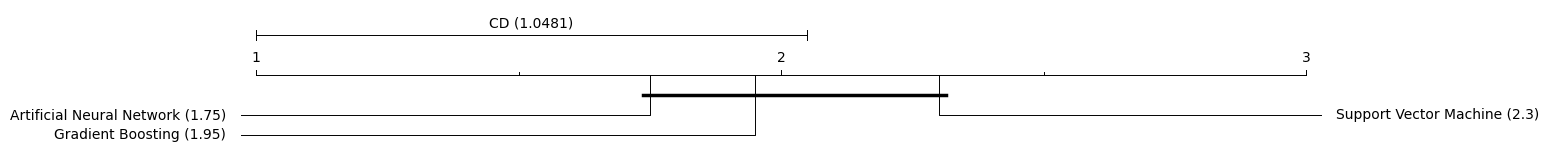

In [16]:
from statds.no_parametrics import nemenyi
num_cases = dataset.shape[0]

ranks_values, critical_distance_nemenyi, figure = nemenyi(rankings, num_cases, alpha)
print(ranks_values)
print(critical_distance_nemenyi)
figure.show()

                                          Comparison  Statistic (Z)   p-value  \
0     Artificial Neural Network vs Gradient Boosting       0.447214  0.654721   
1  Artificial Neural Network vs Support Vector Ma...       1.229837  0.218758   

   Adjusted alpha  Adjusted p-value  alpha         Results  
0           0.025          1.000000   0.05  H0 is accepted  
1           0.025          0.437516   0.05  H0 is accepted  


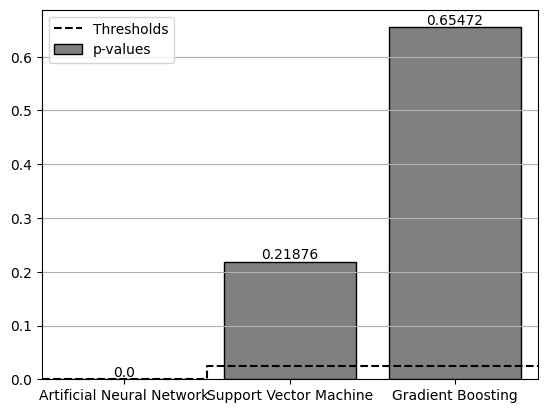

In [19]:
from statds.no_parametrics import bonferroni
num_cases = dataset.shape[0]

results, figure = bonferroni(rankings, num_cases, alpha, control = "Artificial Neural Network", type_rank = "Friedman")
print(results)
figure.show()

It is noticeable that the algorithm most distinct from Random Forest is the Artificial Neural Network (ANN). To scrutinize these differences further, we can analyze the results using a Wilcoxon test. This analysis can confirm, with an alpha level of 0.05, that there are indeed significant differences between these two algorithms. Employing the Wilcoxon test, known for its efficacy in non-parametric pairwise comparisons, provides a robust method to statistically validate the observed disparities between Random Forest and ANN.

In [21]:
from statds.no_parametrics import wilconxon

selected_columns = ["Support Vector Machine", "Artificial Neural Network"]
statistic, p_value, rejected_value, hypothesis = wilconxon(dataset[selected_columns], alpha)
print(hypothesis)
print("Statistic {statistic}, Rejected Value {rejected_value}, p-value {p_value}")

Same distributions (fail to reject H0) with alpha 0.05
Statistic {statistic}, Rejected Value {rejected_value}, p-value {p_value}


### Conclusion

After conducting this comprehensive study, we can conclude that, at a significance level of 0.05 (alpha), these algorithms do not exhibit significant differences overall. This nuanced insight highlights the importance of context and specific comparative analyses in understanding the relative strengths and weaknesses of different machine learning algorithms.